## Highway paths - Are players biased?

Let's focus on intermediate paths between articles, not only on first and last articles of a game path to gain insight on players behaviours. More specifically, we want to investigate whether there exist some common paths that are intensively used by players.

The first thing to do after loading the data is to extract each game path (from paths_finished.csv and paths_unfinished.csv) as a list. Then, we find every pair of articles within those list and we count the number of time that each pair appears. A pair of article is considered as a 1-unit long path and we want to investigate which of those paths are the most used. 
To get more representative results, the counts are normalized by dividing by the total number of 1-unit long paths found in paths_finished.csv and paths_unfinished.csv respectively.

Method
- Extract each game path from paths_finished.csv and paths_unfinished.csv as a list
- Create a new list with every 1-unit long path between articles (returns to previous articles '<' should be removed!)
- Convert the list of pairs into a Pandas DataFrame and counts the number of time that each pair appear using .value_counts()
- Normalize the number of occurences of each pair by the total number of pairs found

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.some_dataloader import *

## Load the data

In [2]:
finished_paths = load_path_finished_dataframe()
finished_paths_divided = finished_paths["path"].apply(lambda row: row.split(';'))

unfinished_paths = load_path_unfinished_distance_dataframe()
unfinished_paths_divided = unfinished_paths["path"].apply(lambda row: row.split(';'))

## Focus on finished paths

In [ ]:
all_pairs_finished = []

# Iterate over all rows of finished_paths
for i in range(len(finished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(finished_paths_divided.iloc[i])):
        if finished_paths_divided.iloc[i][j] != '<': 
            new_row.append(finished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_finished = all_pairs_finished + pairs_row

all_pairs_finished_df = pd.DataFrame({'1-unit long path': all_pairs_finished})

## Focus on unfinished paths

In [ ]:
all_pairs_unfinished = []

# Iterate over all rows of unfinished_paths
for i in range(len(unfinished_paths_divided)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(unfinished_paths_divided.iloc[i])):
        if unfinished_paths_divided.iloc[i][j] != '<': 
            new_row.append(unfinished_paths_divided.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b), (b,c), (c,d)]
    pairs_row = [(new_row.iloc[j], new_row.iloc[j+1]) for j in range(len(new_row) - 1)]


    # Pairs found for each rows are combined in a unique list
    all_pairs_unfinished = all_pairs_unfinished + pairs_row

all_pairs_unfinished_df = pd.DataFrame({'1-unit long path': all_pairs_unfinished})

## Combine finished and unfinished paths 

In [40]:
all_pairs_merged = pd.concat([all_pairs_finished_df, all_pairs_unfinished_df])

## Normalization

In [8]:
# Normalisation (divide by the total number of pair)
all_pairs_finished_normalized = all_pairs_finished_df.value_counts() / all_pairs_finished_df.value_counts().sum()
all_pairs_unfinished_normalized = all_pairs_unfinished_df.value_counts() / all_pairs_unfinished_df.value_counts().sum()
all_pairs_merged_normalized = all_pairs_merged.value_counts() / all_pairs_merged.value_counts().sum()

## Visualisation of 1-unit long paths the most taken by players

For visualisation purposes, we plot only the top 20 of 1-unit long paths. We decided to first plot the paths from paths_finished.csv and paths_unfinished.csv, and then combine the two results. 

In [9]:
# Select the top 20 of 1-unit long paths for visualisation 
top20_finished = all_pairs_finished_normalized.head(20)
top20_unfinished = all_pairs_unfinished_normalized.head(20)
top20_merged = all_pairs_merged_normalized.head(20)

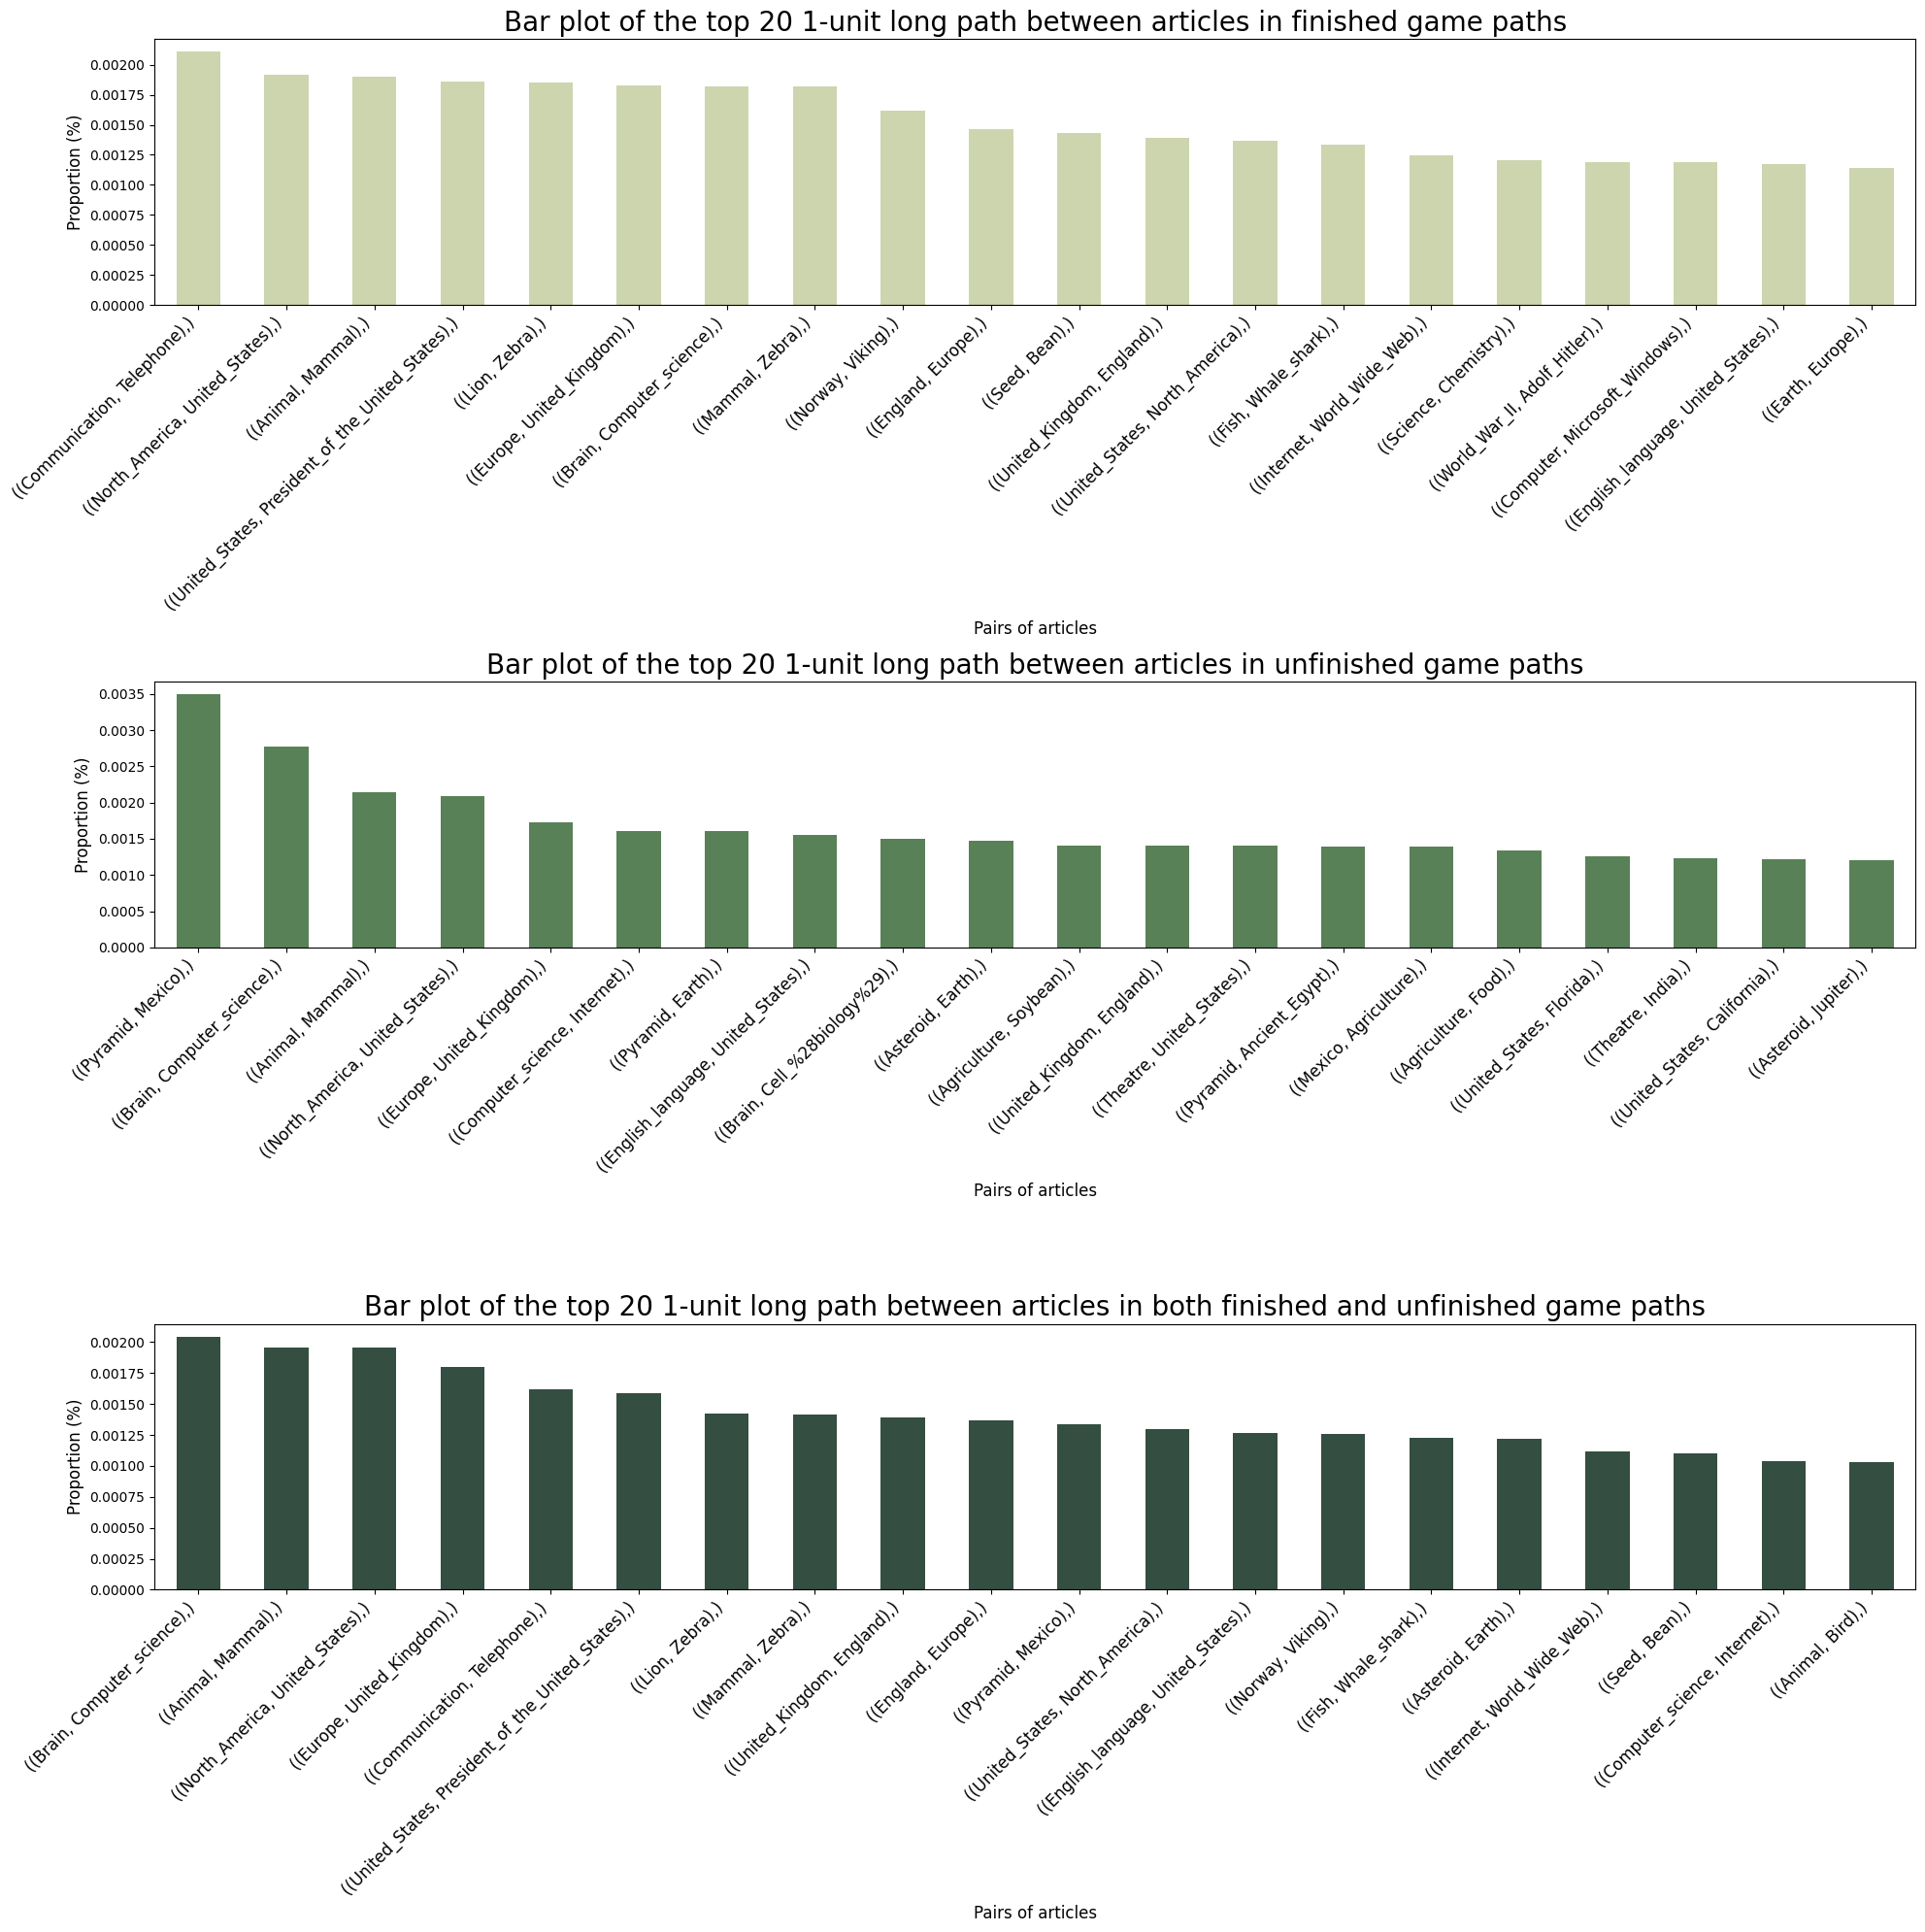

In [ ]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
top20_finished.plot(kind='bar', width= 0.5, color='#ccd5ae')
plt.title('Bar plot of the top 20 1-unit long path between articles in finished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.subplot(3, 1, 2)
top20_unfinished.plot(kind='bar', width= 0.5, color='#588157')
plt.title('Bar plot of the top 20 1-unit long path between articles in unfinished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.subplot(3, 1, 3)
top20_merged.plot(kind='bar', width= 0.5, color='#344e41')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=20)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.tight_layout()
plt.show()

This plot allows us to compare the 1-unit long paths between paths_finished.csv and paths_unifished.csv. Interestingly, some paths like Communication -> Telephone or Mammal -> Zebra only appear in the top 20 obtained from paths_finished.csv while other paths like Pyramid -> Mexico or Europe -> United Kingdom only appear in the top 20 obtained from paths_unfinished.csv. This could indicate that a difference of the player's behavior might have an influence on whether they win the game or not.

However, to identify "highway paths", we find it more relevant to combine counts from both datasets. The third subplot highlights paths that are most often taken by players. However, those normalized results indicate that even the top 1 path correponds to only 0.2% which is almost nothing.

## Associate articles to their country

In [ ]:
country_clicks = pd.read_csv("data/country_clicks_links.csv", index_col=0)

In [ ]:
# Divide pairs into 2 columns 'From' and 'To' > Split
all_pairs_countries = all_pairs_merged.copy()
all_pairs_countries['Article_from'] = all_pairs_merged['1-unit long path'].apply(lambda row: row[0].split(',')[0] if isinstance(row[0], str) else row)
all_pairs_countries['Article_to'] = all_pairs_merged['1-unit long path'].apply(lambda row: row[1].split(',')[0] if isinstance(row[0], str) else row)

# Associate each article from columns 'From' and 'To' to their Top_1_name country
all_pairs_countries['Top1_country_From'] = all_pairs_countries['Article_from'].map(country_clicks['Top_1_name'])
all_pairs_countries['Top1_country_To'] = all_pairs_countries['Article_to'].map(country_clicks['Top_1_name'])

# Create a column with a pair of countries
all_pairs_countries['1-unit long path - COUNTRIES'] = all_pairs_countries['Top1_country_From'] + "-> " + all_pairs_countries['Top1_country_To']

In [43]:
all_pairs_countries_normalized = all_pairs_countries["1-unit long path - COUNTRIES"].value_counts() / all_pairs_countries["1-unit long path - COUNTRIES"].value_counts().sum()
top40_countries = all_pairs_countries_normalized.head(40)

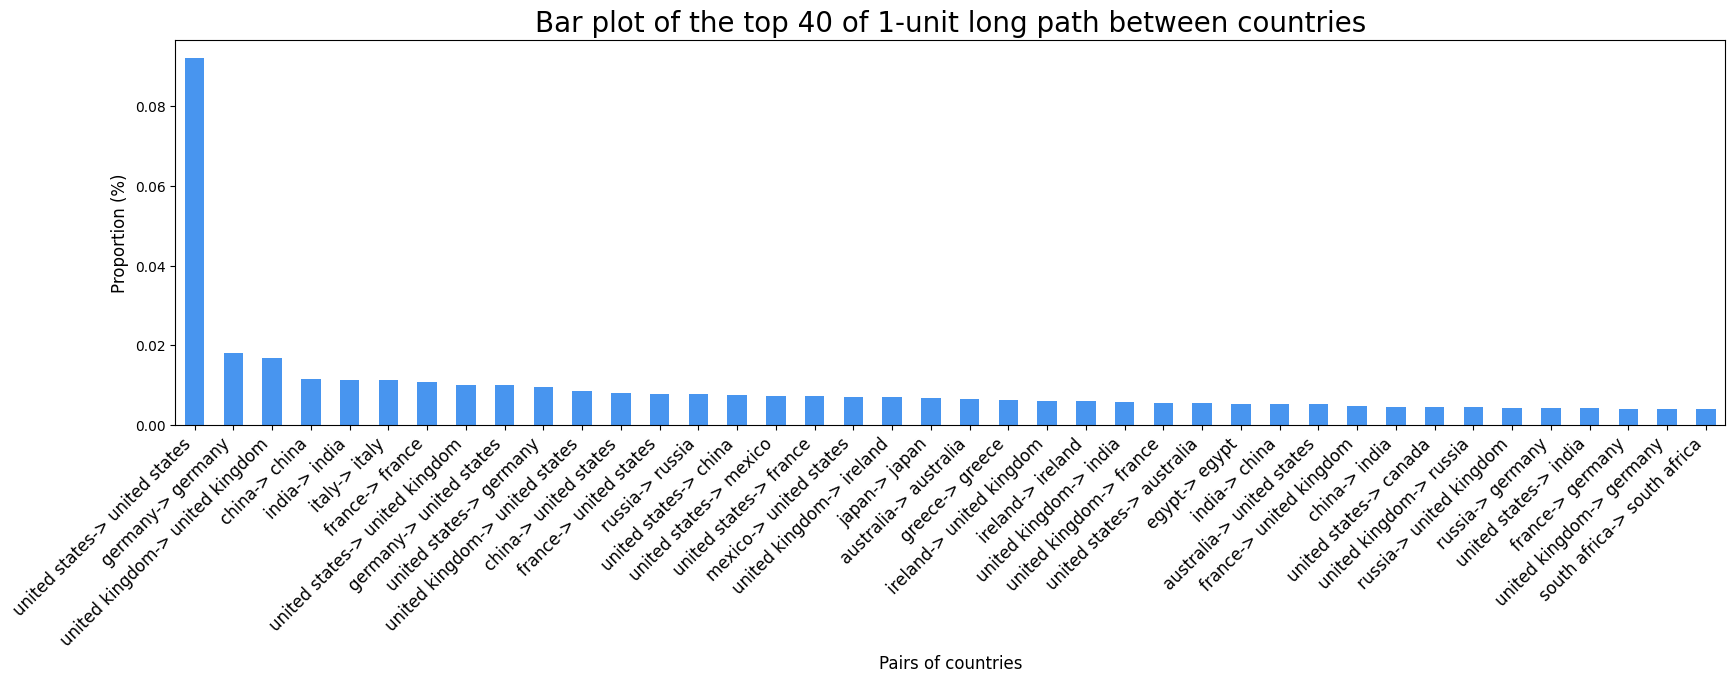

In [44]:
plt.figure(figsize=(20, 5))

top40_countries.plot(kind='bar', width= 0.5, color='#4895ef')
plt.title('Bar plot of the top 40 of 1-unit long path between countries', fontsize=20)
plt.xlabel('Pairs of countries', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.show()

There's a clear dominance of paths from United States to United states, those paths corresponds to approximately 9% of the total number of paths taken by players. Among the top 40 paths, we can also see that there are a lot of paths linking a country to itself (ex: Germany -> Germany, United Kingdom -> United Kingdom, etc.) which is expected as we previously saw that articles of one country are strongly interconnected.

Interestingly, there are also paths between two different countries. Some of them are neighbour countries like United Kingdom and Ireland but most paths linking 2 different countries actually revolve around the United States (United States -> Germany, France -> Germany, United States -> China, etc.). Therefore, it seems that they are highway paths to and from the main hub of the United States.

## Test for 2-unit long paths

To go even further, we investigate whether there are also 2-unit long paths between articles that are oftenly used by players. 

In [14]:
all_paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
paths_merged = all_paths.apply(lambda row: row.split(';'))

In [ ]:
all_trios_merged = []

# itérer sur toutes les lignes de finished_paths
for i in range(len(paths_merged)): 
    # preprocess to get rid of "<" and not loose path information > [a, b, <, c] becomes [a, c]
    new_row = []

    for j in range(len(paths_merged.iloc[i])):
        if paths_merged.iloc[i][j] != '<': 
            new_row.append(paths_merged.iloc[i][j])

        else :
            new_row.pop()
    new_row = pd.Series(new_row)


    # For each row with a path [a,b,c,d], we create a list of [(a,b, c), (b,c, d)]
    trios_row = [(new_row.iloc[j], new_row.iloc[j+1], new_row.iloc[j+2]) for j in range(len(new_row) - 2)]


    # Trios found for each rows are combined in a unique list
    all_trios_merged = all_trios_merged + trios_row

all_trios_merged_df = pd.DataFrame({'2-unit long path': all_trios_merged})
all_trios_merged_normalized = all_trios_merged_df.value_counts() / all_trios_merged_df.value_counts().sum()

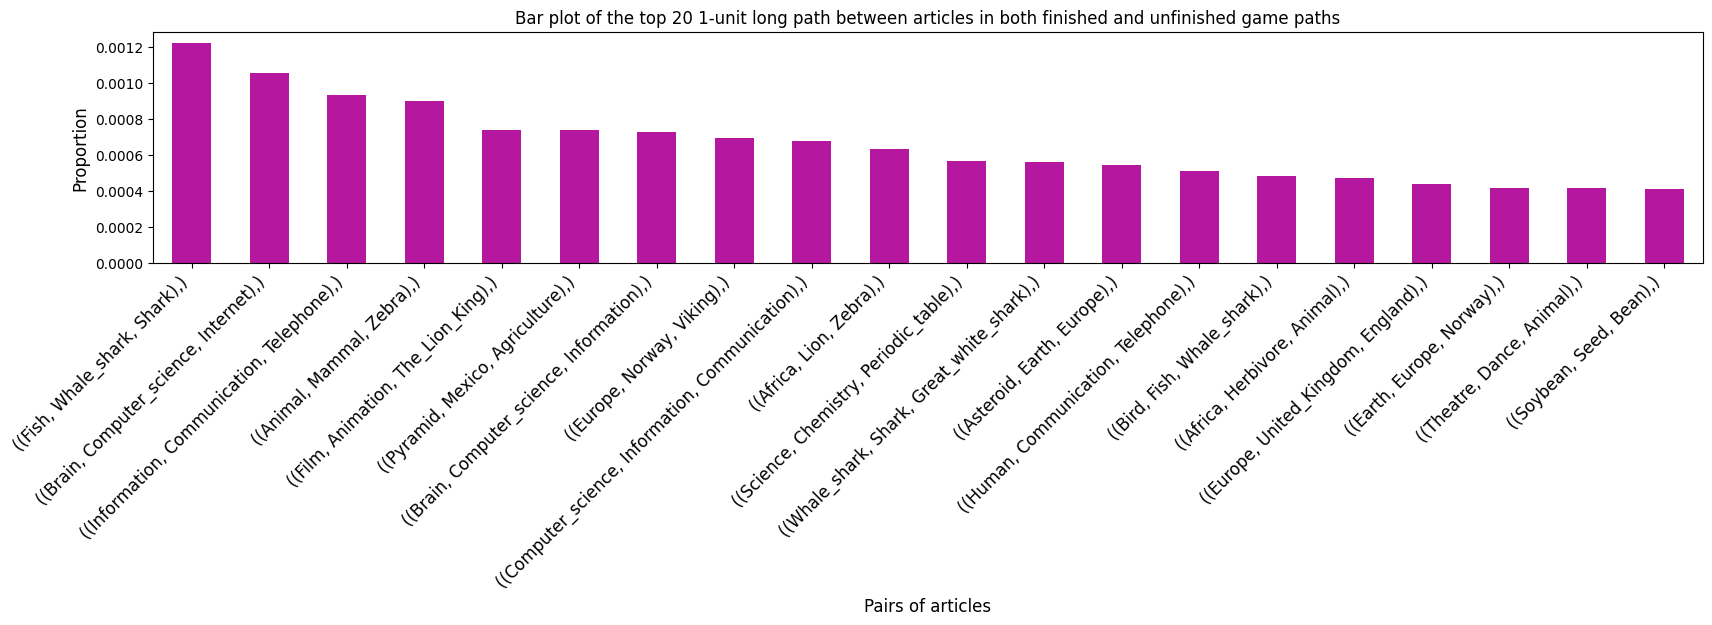

In [ ]:
# Barplot of the top20 trio in both finished and unifinished paths 
top20_trio_merged = all_trios_merged_normalized.head(20)

plt.figure(figsize=(20, 3))
top20_trio_merged.plot(kind='bar', width= 0.5, color='#b5179e')
plt.title('Bar plot of the top 20 1-unit long path between articles in both finished and unfinished game paths', fontsize=12)
plt.xlabel('Pairs of articles', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)
plt.show()

As for the 1-unit long paths, we can see that even the most often taken path only corresponds to 0.02% which might not be so significant. But let's associate articles with their Top 1 country to investigate it further.

In [72]:
# Divide trios into 2 columns 'From', 'Intermediate' and 'To' > Split
all_trios_countries = all_trios_merged_df.copy()

all_trios_countries['Article_from'] = all_trios_merged_df['2-unit long path'].apply(lambda row: row[0].split(',')[0])
all_trios_countries['Article_intermediate'] = all_trios_merged_df['2-unit long path'].apply(lambda row: row[1].split(',')[0])
all_trios_countries['Article_to'] = all_trios_merged_df['2-unit long path'].apply(lambda row: row[2].split(',')[0])

all_trios_countries.head()

# Associate each article from columns 'From', 'Intermediate' and 'To' to their Top_1_name country
all_trios_countries['Top1_country_From'] = all_trios_countries['Article_from'].map(country_clicks['Top_1_name'])
all_trios_countries['Top1_country_Intermediate'] = all_trios_countries['Article_intermediate'].map(country_clicks['Top_1_name'])
all_trios_countries['Top1_country_To'] = all_trios_countries['Article_to'].map(country_clicks['Top_1_name'])

# Create a column with a trios of countries
all_trios_countries['2-unit long path - COUNTRIES'] = all_trios_countries['Top1_country_From'] + "-> " + all_trios_countries['Top1_country_Intermediate'] + "->" + all_trios_countries['Top1_country_To']


NameError: name 'country_clicks' is not defined

In [70]:
all_trios_countries_normalized = all_trios_countries["2-unit long path - COUNTRIES"].value_counts() / all_trios_countries["2-unit long path - COUNTRIES"].value_counts().sum()
top40_countries_trios = all_trios_countries_normalized.head(40)

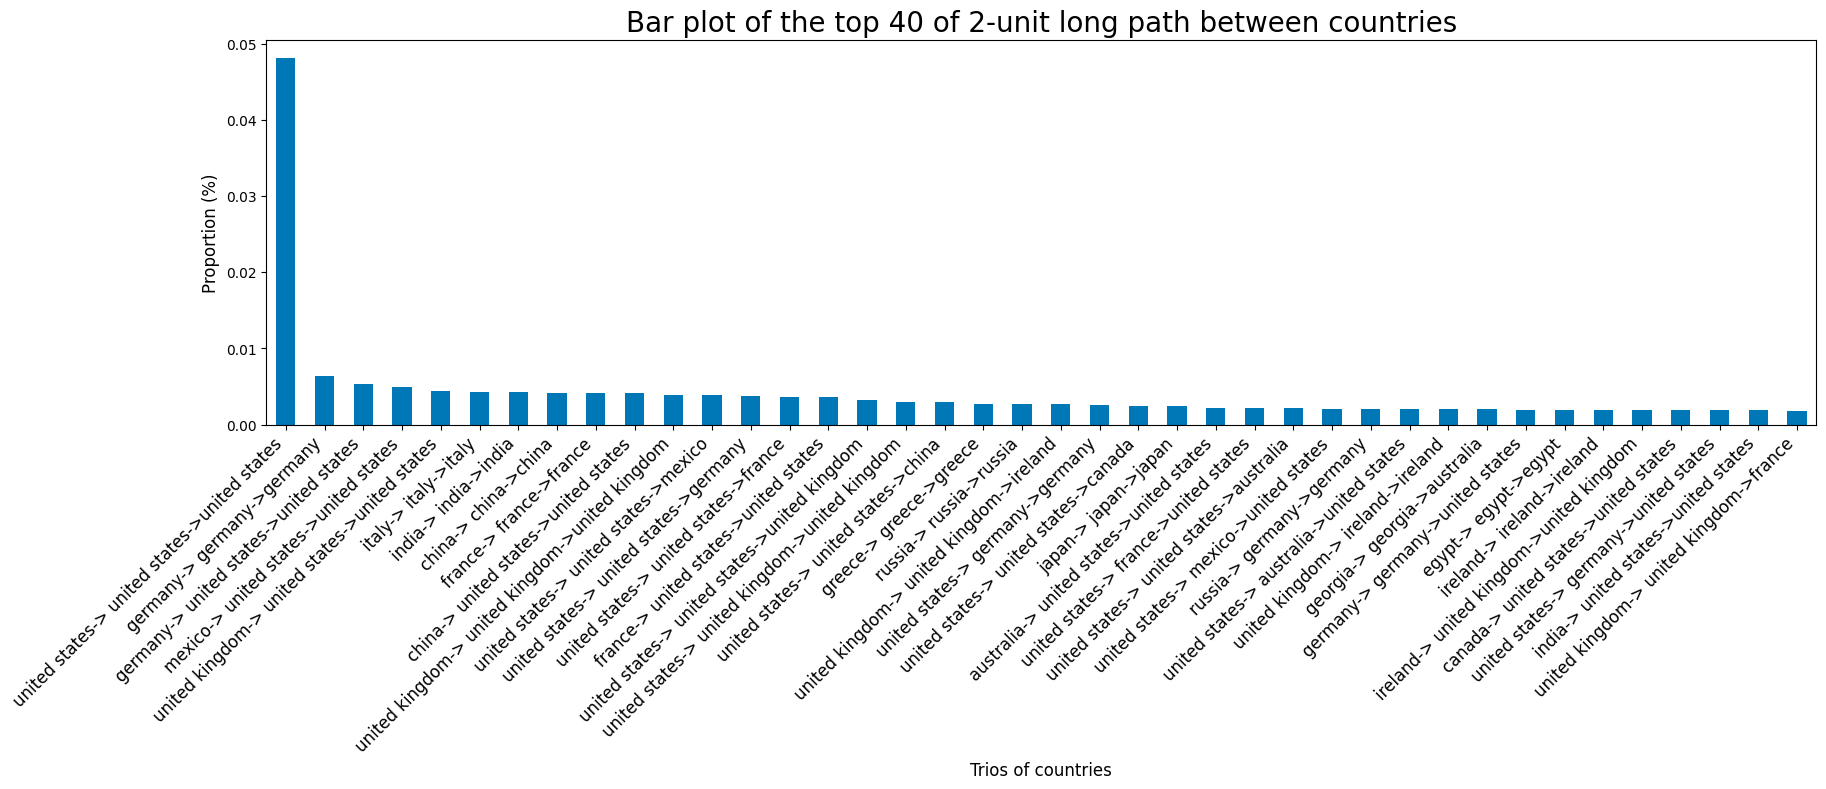

In [71]:
plt.figure(figsize=(20, 5))

top40_countries_trios.plot(kind='bar', width= 0.5, color='#0077b6')
plt.title('Bar plot of the top 40 of 2-unit long path between countries', fontsize=20)
plt.xlabel('Trios of countries', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)
plt.xticks(rotation=45,ha='right',fontsize=12)

plt.show()

It remains to display all those informations on a map!

Can those highway paths be linked to a cultural bias?